# Linear, Lasso, Ridge and Elastic Net Regressions

Code from https://medium.com/@jayeshbahire/lasso-ridge-and-elastic-net-regularization-4807897cb722

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Import the dataset

In [3]:
from sklearn import datasets
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston.keys()
boston.data.shape
boston.feature_names
boston.target[:10]

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

(506, 13)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Add dependent Variable
df['House_Price'] = boston.target
df.head()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X = df.drop(columns=['House_Price'])
y = df['House_Price']
X.head()
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

# Let's now create our models

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
lm = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic  = ElasticNet()
lm
lasso
ridge
elastic

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## Fit the models

In [11]:
lm.fit(train_X,train_y)
lasso.fit(train_X,train_y)
ridge.fit(train_X,train_y)
elastic.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
plt.rc('axes', axisbelow=True)

## Evaluate the models

Text(0.5,1,'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)')

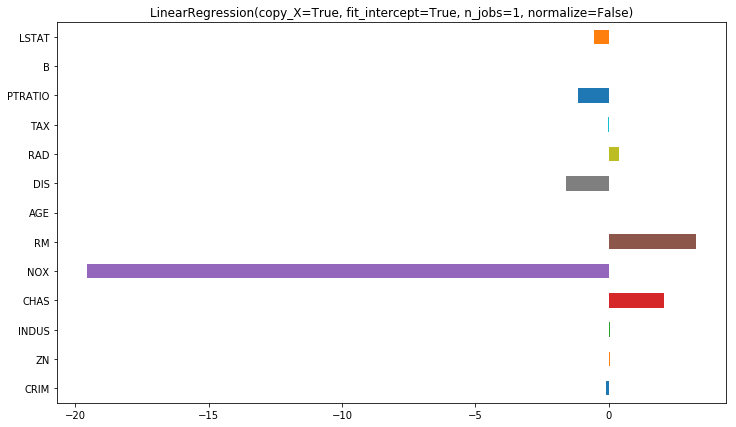

Text(0.5,1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,\n   normalize=False, positive=False, precompute=False, random_state=None,\n   selection='cyclic', tol=0.0001, warm_start=False)")

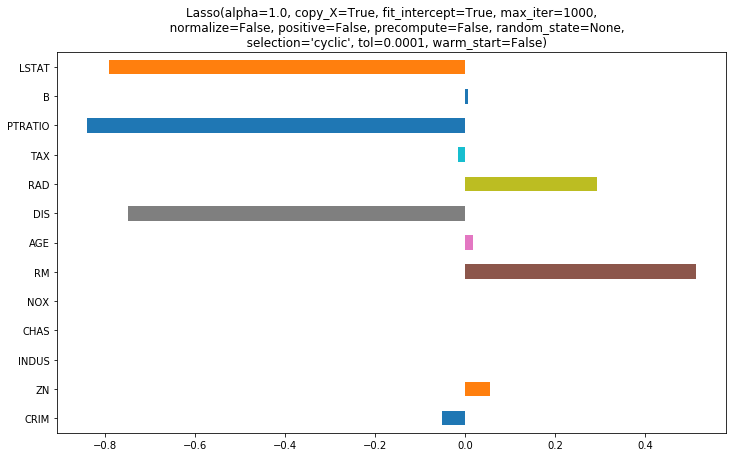

Text(0.5,1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,\n   normalize=False, random_state=None, solver='auto', tol=0.001)")

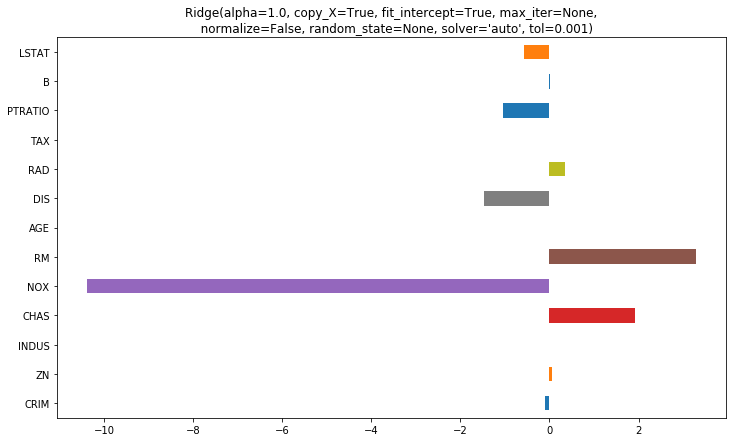

Text(0.5,1,"ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,\n      max_iter=1000, normalize=False, positive=False, precompute=False,\n      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)")

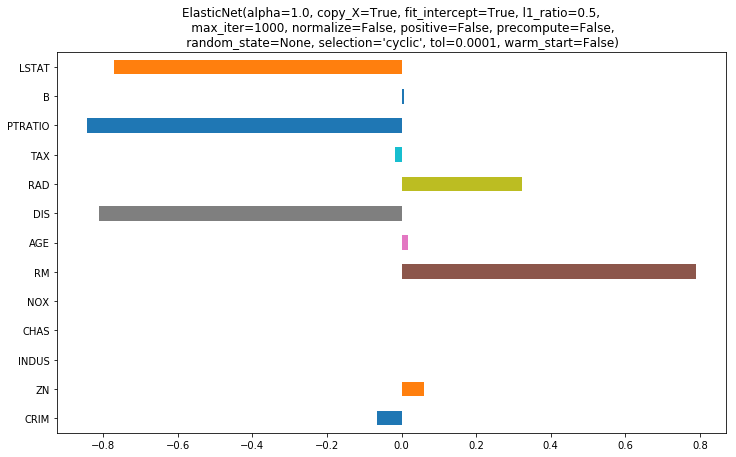

In [13]:
for i in [lm,lasso,ridge,elastic]:
    plt.figure(figsize=(12,7));
    ft_importance_lm = pd.Series(i.coef_, index = X.columns)
    ft_importance_lm.plot(kind = 'barh')
    plt.title(str(i));
    plt.show();

## R2 Value

In [14]:
print('RSquare Value for Simple Regression TEST data',np.round(lm.score(test_X,test_y)*100,1))
print('RSquare Value for Lasso Regression TEST data',np.round(lasso.score(test_X,test_y)*100,1))
print('RSquare Value for Ridge Regression TEST data',np.round(ridge.score(test_X,test_y)*100,1))
print('RSquare Value for Elastic Net Regression TEST data',np.round(elastic.score(test_X,test_y)*100,1))

RSquare Value for Simple Regression TEST data 74.5
RSquare Value for Lasso Regression TEST data 67.4
RSquare Value for Ridge Regression TEST data 74.6
RSquare Value for Elastic Net Regression TEST data 68.4


## Loss Function

In [15]:
predict_test_lm = lm.predict(test_X)
predict_test_lasso = lasso.predict(test_X)
predict_test_ridge = ridge.predict(test_X)
predict_test_elastic = elastic.predict(test_X)

In [16]:
from sklearn import metrics
print('Simple Regression MSE for test data :',np.round(metrics.mean_squared_error(test_y,predict_test_lm),2))
print('Lasso Regression MSE for test data :',np.round(metrics.mean_squared_error(test_y,predict_test_lasso),2))
print('Ridge Regression MSE for test data :',np.round(metrics.mean_squared_error(test_y,predict_test_ridge),2))
print('Elastic Net Regression MSE for test data :',np.round(metrics.mean_squared_error(test_y,predict_test_elastic),2))

Simple Regression MSE for test data : 20.61
Lasso Regression MSE for test data : 26.4
Ridge Regression MSE for test data : 20.6
Elastic Net Regression MSE for test data : 25.6
